In [3]:
# Import libraries and stuff
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline     
import sklearn
#%load_ext autoreload
#%autoreload 3

In [4]:
import utils_linear_response

Here we show how to infer causality from time using the Fluctuation-Response framework proposed in https://journals.aps.org/prresearch/abstract/10.1103/PhysRevResearch.2.043436 and further extended in https://arxiv.org/abs/2306.14433

The main novelty proposed in https://arxiv.org/abs/2306.14433 is the first (as far as we know) analytical null model for the Fluctuation Dissipation Relation in statistical physics. Such null model is important when inferring causality in real data as it allows to remove spurious results at a given confidence level.

This notebook implement the whole framework directly from a set of 3 time series. Such time series come from running the simple model in Section "A simple example" in https://arxiv.org/abs/2306.14433 

A step by step guide to this causal inference framework is in the companion notebook "explainin.ipynb". Here we just show the main commands to run the code.

In [5]:
import utils_linear_response

## Load time series

In [6]:
# load the time series
x_t = np.load('./results/example_orbit_10_to_5.npy')

In [7]:
# IMPORTANT: Format of the dataset should be [Number of time series, number of time samples]
np.shape(x_t)

(3, 99900)

## Compute linear responses

In [8]:
### Parameters for Response

# we compute responses up to a lag tau_max
tau_max = 20
# we compute correlations
standardized = 'yes'

In [9]:
########## Compute the response matrix
response_matrix = utils_linear_response.response(x_t,tau_max,standardized)

In [10]:
response_matrix.shape

(20, 3, 3)

## Compute confidence bounds

In [11]:
########## Compute statistical significance

############################## Step (a)
# Compute the lag 1 autocorrelation

# lag-1 autocorrelation
print('Computing lag-1 autocorr')
phi = utils_linear_response.phi_vector(x_t)

############################## Step (b)
# Compute standard deviations of each time series

# sigmas
print('Computing sigmas')
sigmas = utils_linear_response.sigmas(x_t)

### Parameters

# we compute responses up to a lag tau_max
tau_max = 20
# we compute covariances
standardized = 'yes'

s = 3
# This correspondes to +/- 3 sigmas

s_minus, s_plus = utils_linear_response.compute_quantile_analytical_tau_discrete(x_t,phi,sigmas,tau_max,s,standardized)

Computing lag-1 autocorr
Computing sigmas



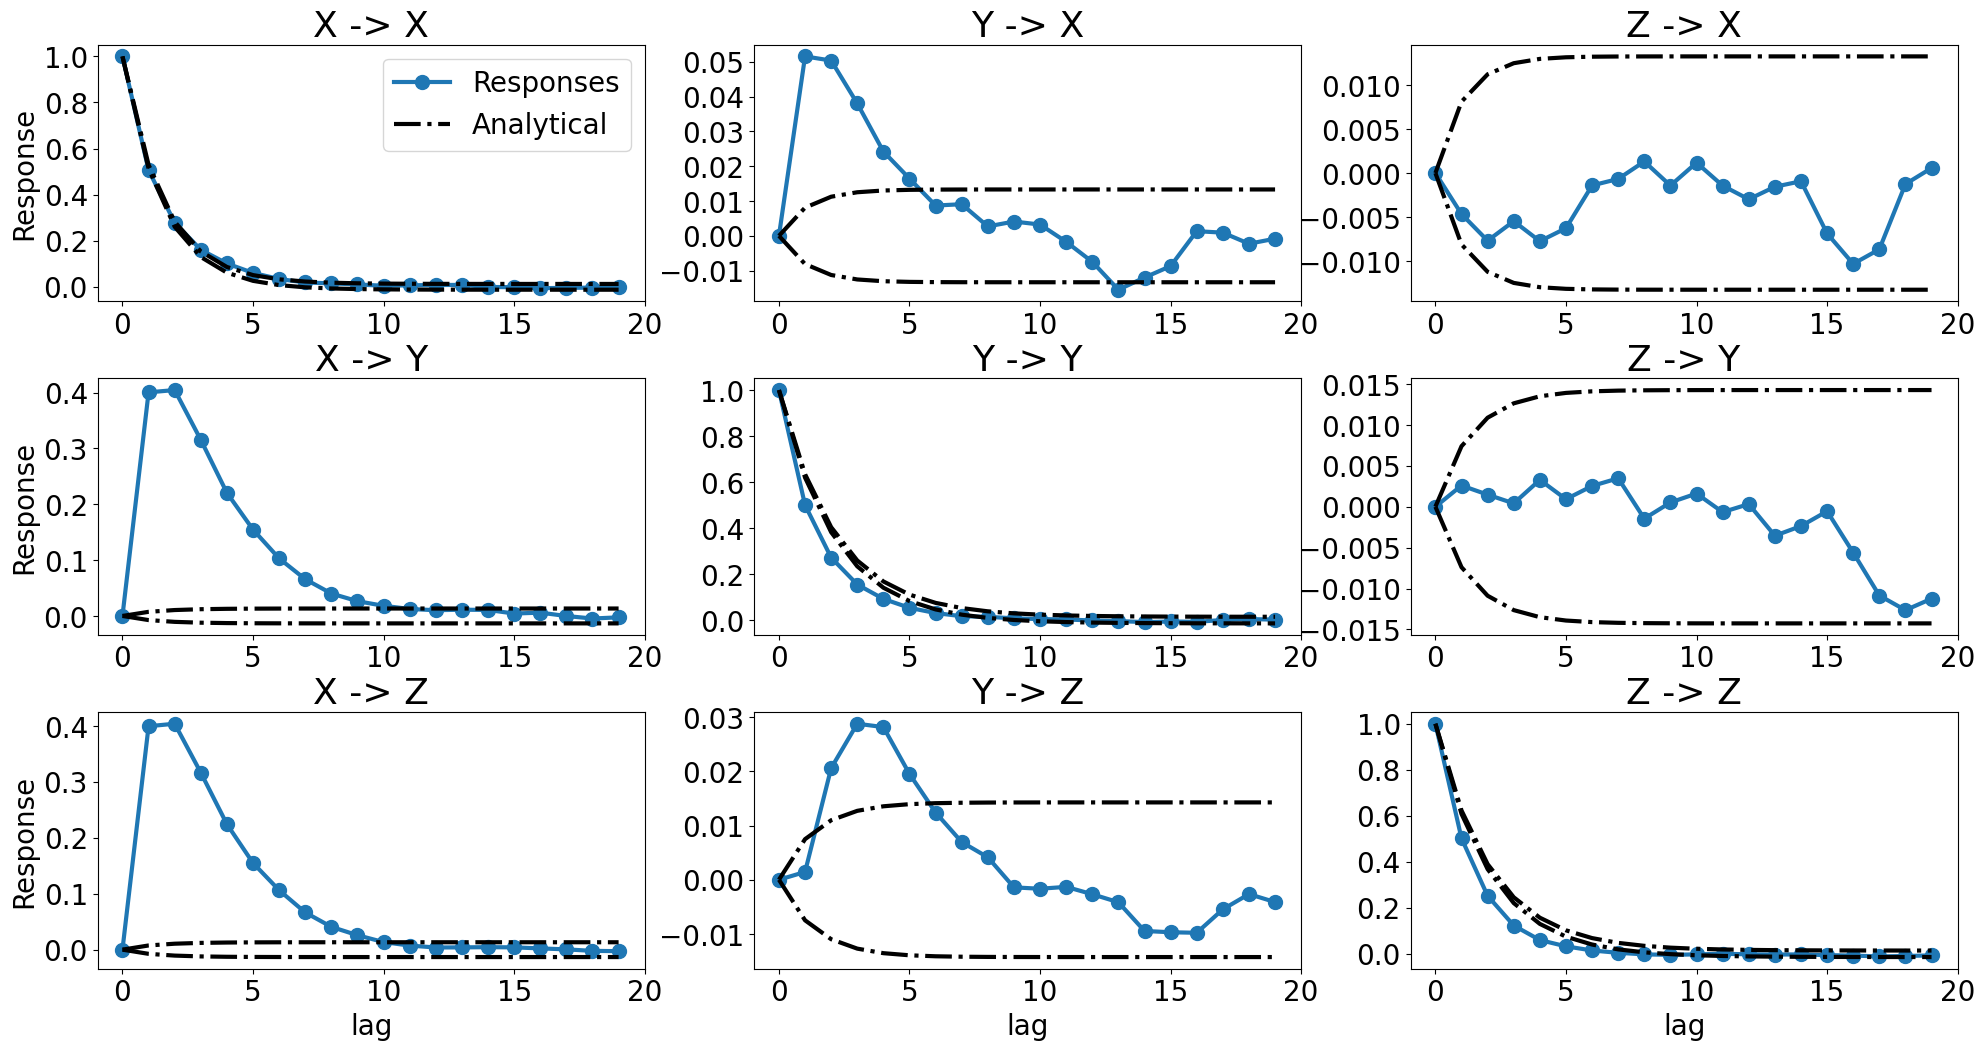

In [14]:
fig = plt.figure(figsize=(24,12))

for i in range(3):
    
    for j in range(3):
        
        if i == 0:
            subplot_idx = j + 1
        if i == 1:
            subplot_idx = j + 4
        if i == 2:
            subplot_idx = j + 7    

        ax = plt.subplot(3, 3, subplot_idx)
        
        plt.plot(response_matrix[:,i,j],'.-',label = 'Responses',linewidth = 3,markersize = 20)
        plt.plot(s_plus[:,i,j],'-.',color = 'k',linewidth = 3,markersize = 20)
        plt.plot(s_minus[:,i,j],'-.',label = 'Analytical',color = 'k',linewidth = 3,markersize = 20)
        
        if i == 0 and j == 0:
            plt.legend(fontsize = 20)
            
        if i == 0 and j == 0 or i == 1 and j == 0 or i == 2 and j == 0:
            plt.ylabel('Response',fontsize = 20)
            
        if i == 2 and j == 0 or i == 2 and j == 1 or i == 2 and j == 2:
            plt.xlabel('lag',fontsize = 20)  
            
        title_fontsize = 26    
            
        if i == 0 and j == 0:
            plt.title('X -> X',fontsize = title_fontsize)
        if i == 1 and j == 1:
            plt.title('Y -> Y',fontsize = title_fontsize) 
        if i == 2 and j == 2:
            plt.title('Z -> Z',fontsize = title_fontsize) 
            
        if i == 0 and j == 1:
            plt.title('Y -> X',fontsize = title_fontsize)
        if i == 0 and j == 2:
            plt.title('Z -> X',fontsize = title_fontsize) 
            
        if i == 1 and j == 0:
            plt.title('X -> Y',fontsize = title_fontsize)
        if i == 1 and j == 2:
            plt.title('Z -> Y',fontsize = title_fontsize)
            
        if i == 2 and j == 0:
            plt.title('X -> Z',fontsize = title_fontsize)
        if i == 2 and j == 1:
            plt.title('Y -> Z',fontsize = title_fontsize)     
        
        plt.xticks(fontsize = 20)
        plt.yticks(fontsize = 20)
        ax.set_xticks([0,5,10,15,20])
        ax.set_xticklabels(['0','5','10','15','20'])
        
        #plt.xlim([0,1])
        #plt.xlim([0.6,1.0])
        
        plt.subplots_adjust(wspace=0.2, hspace=0.3)
        
#fig.savefig('./figures/reponse_ensemble_significance.eps',bbox_inches='tight') 

## Metrics 

### (i) degree of causation for each $x_j \rightarrow x_k$ 

### (ii) causal strength of each $x_j$

In [16]:
strengths_j_k, strengths_j = utils_linear_response.node_strength_significance(response_matrix,s_plus,s_minus)

In [18]:
for j in range(3):
    for k in range(3):
        print('Strength connections of node j = '+str(j)+' ---> k = '+str(k)+ ':  ' + str(strengths_j_k[j,k]) )
    print('')    

Strength connections of node j = 0 ---> k = 0:  0.8626305425950247
Strength connections of node j = 0 ---> k = 1:  1.7493913715638088
Strength connections of node j = 0 ---> k = 2:  1.7518657860456404

Strength connections of node j = 1 ---> k = 0:  0.1960335265758487
Strength connections of node j = 1 ---> k = 1:  1.1197710036943553
Strength connections of node j = 1 ---> k = 2:  0.09698870523386442

Strength connections of node j = 2 ---> k = 0:  0.0
Strength connections of node j = 2 ---> k = 1:  0.0
Strength connections of node j = 2 ---> k = 2:  0.9951307155684302



In [19]:
for j in range(3):
    print('Causal strength of node j = '+str(j)+ ':  ' + str(strengths_j[j]))

Causal strength of node j = 0:  3.501257157609449
Causal strength of node j = 1:  0.2930222318097131
Causal strength of node j = 2:  0.0
